In [1]:
import openai
import pennylane as qml
from PIL import Image
# import numpy as np

In [2]:
from key import api_key

In [3]:
from openai import OpenAI

client = OpenAI(api_key=api_key)

def prob_image_arr(arr, openai_api_key):
    # Use OpenAI API to interpret the text
    openai.api_key = openai_api_key

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
            #   {
            #      "role": "system",
            #      "content": "The model is tasked with analyzing a 2D binary array. It should output '1' if the '1's in the array form a perfect rectangle, without any breaks or irregularities. If the '1's do not form a perfect rectangle, the model should output '0'. This binary output should be based solely on the geometric arrangement of '1's within the array."
            #   },
            {
             "role": "system",
               "content": "The model is tasked to receive a 2D binary array consisting of 0s and 1s, with the 1s forming a specific shape. It should analyze this shape and calculate a score from 0 to 1 that indicates how closely this shape resembles a rectangle. A score of 1 denotes an exact rectangle, while a score of 0 indicates no resemblance to a rectangle. The model should focus on the spatial arrangement and continuity of the 1s to determine this score. The output should only be the score with a single number as output without any extra text as explanation."

            # "content": "The model's task is to analyze a 2D binary array and provide a numerical score between 0 and 1. This score represents how closely the '1's in the array resemble a rectangle, with 1 being a perfect rectangle and 0 indicating no resemblance. The model should output only the score, without any accompanying explanation."
            },
            #   {
            #      "role": "system",
            #      "content": "The model is tasked with analyzing a 2D binary array and providing a score between 0 and 1. This score should reflect how closely the arrangement of '1's within the array resembles a rectangle. A score of 1 indicates a perfect rectangle, while a score closer to 0 suggests less resemblance to a rectangle. The model should consider factors such as the continuity, alignment, and proportion of '1's in determining this score."
            #   },
              {"role": "user", "content": f"{arr}"}
            ]
        )
        # print(response)
        content = content = response.choices[0].message.content
        return content
    except Exception as e:
        return f"Error in OpenAI API call: {e}"


In [4]:
# is_arr = prob_image_arr(input_arr, api_key)
# print(is_arr)

In [5]:
import pennylane as qml
from scipy.optimize import minimize
from pennylane import numpy as np




In [6]:
n_qubits = 8
dev = qml.device('default.qubit', wires=n_qubits)

In [7]:
def find_n_largest_numbers(arr, n):
    # Find the indices of the n largest elements
    indices = np.argsort(arr)[-n:]
    # Find the n largest elements
    largest_elements = arr[indices]
    return largest_elements, indices
qml
def indices_to_binary(indices):
    # Convert each index to binary and ensure it's 8 bits
    return [format(index, f'0{n_qubits}b') for index in indices]

def int_to_binary(n, digits):
    binary_str = format(n, 'b')
    # Pad the binary string with leading zeros to ensure it has 'digits' length
    return binary_str.zfill(digits)

In [8]:
# Define the quantum circuit
@qml.qnode(dev)
def circuit(param,index):
    index = int_to_binary(index,n_qubits)
    # for i, char in enumerate(index):
    #     if(char=='1'):
    #         qml.PauliX(wires=i)
    #     # qml.Hadamard(wires=i)
            
    qml.StronglyEntanglingLayers(weights=param, wires=range(n_qubits))
    return qml.probs(wires=range(n_qubits))



In [9]:
def convert_to_int(nested_list):
    return [[int(element) for element in sublist] for sublist in nested_list]

def binary_array_to_png_and_display(binary_array, scale_factor=10):
    binary_array = convert_to_int(binary_array)
    # Convert the binary array to a numpy array with values 0 and 255
    image_array = np.array(binary_array) * 255

    # Create an image object from the numpy array
    image = Image.fromarray(np.uint8(image_array), 'L')

    # Scale the image
    original_size = image.size
    scaled_size = tuple([dimension * scale_factor for dimension in original_size])
    scaled_image = image.resize(scaled_size, Image.NEAREST)
    display(scaled_image)


In [10]:
def feature_map(input_arr):
    """Flatten the 2D binary array into a 1D feature map."""
    return [item for sublist in input_arr for item in sublist]

def cosine_similarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors."""
    vec1, vec2 = np.array(vec1), np.array(vec2)
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    if norm_vec1 * norm_vec2==0:
        return 0.1
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

In [11]:
a = int_to_binary(4,5)
for i, char in enumerate(a):
    if(char=='1'):
        print(True)

True


In [12]:
smiley_pattern = np.array([
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])
smiley_pattern_vec = feature_map(smiley_pattern)

In [13]:
# Define the shape of the parameters
shape_p = qml.StronglyEntanglingLayers.shape(n_layers=2, n_wires=n_qubits)

# Define the objective function (to be minimized)
def objective(params):
    print(params)
    print('============')
    # original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    # weights_p1_flat = params[0 : original_length]
    # print('Param')
    # print(weights_p1_flat)
    # weights_p2_flat = params[original_length : 2*original_length]
    # weights_p3_flat = params[2*original_length : 3*original_length]
    # weights_p4_flat = params[3*original_length : 4*original_length]

    # Reshape each segment
    # weights_p1 = weights_p1_flat.reshape(shape_p)
    # print(weights_p1)
    # weights_p2 = weights_p2_flat.reshape(shape_p)
    # weights_p3 = weights_p3_flat.reshape(shape_p)
    # weights_p4 = weights_p4_flat.reshape(shape_p)
    # print('===================')
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(params,i)
        largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        binary_indices = indices_to_binary(indices)
        # print(largest_elements)
        print(binary_indices)
        image_arr.append(list(binary_indices[0]))
    print('==============')
    # print(image_arr)
    # Display the image
    binary_array_to_png_and_display(image_arr,scale_factor=20)
    # print(prob_image_arr(image_arr,api_key))
    image_arr = convert_to_int(image_arr)
    generated_img_feature_map = feature_map(convert_to_int(image_arr))
    score = cosine_similarity(smiley_pattern_vec,generated_img_feature_map)
    print(score)
    
    # print("Largest elements:", largest_elements)
    # print("Indices:", indices)
    # print("Indices in binary:", binary_indices)

    return score



# Initialize the weights
shape_p = qml.StronglyEntanglingLayers.shape(n_layers=1, n_wires=n_qubits)
weights_p1 = np.random.random(size=shape_p,required_grad=True)
print(weights_p1)




TypeError: random() got an unexpected keyword argument 'required_grad'

Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


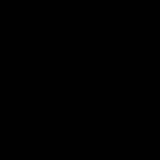

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 0,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


c:\Users\acade\anaconda3\envs\q1\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


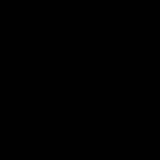

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 1,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


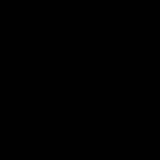

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 2,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


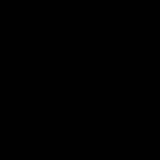

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 3,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


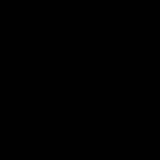

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 4,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


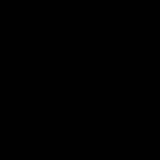

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 5,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


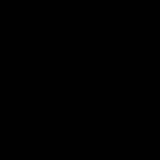

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 6,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


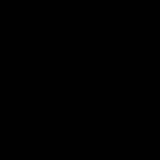

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 7,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


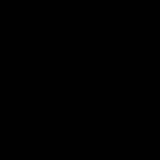

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 8,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


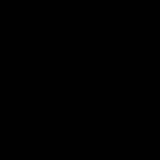

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 9,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


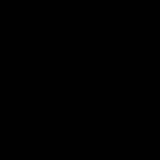

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 10,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


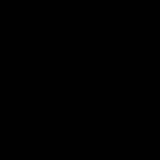

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 11,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


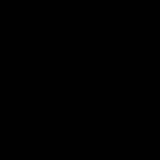

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 12,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


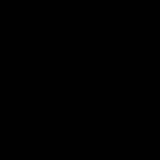

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 13,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


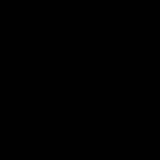

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 14,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


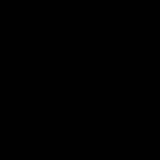

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 15,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


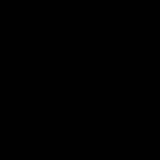

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 16,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


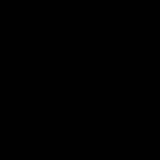

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 17,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


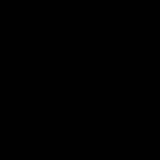

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 18,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


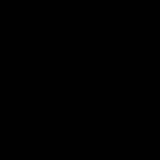

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 19,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


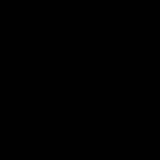

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 20,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


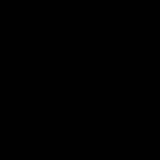

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 21,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


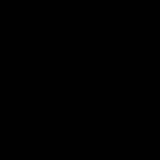

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 22,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


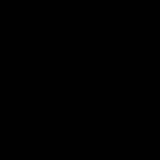

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 23,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


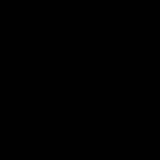

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 24,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


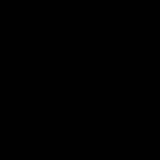

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 25,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


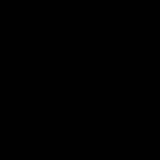

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 26,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


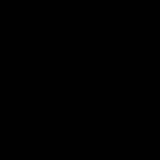

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 27,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


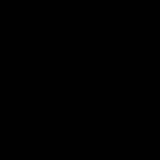

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 28,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


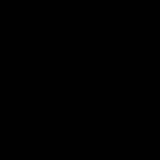

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 29,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


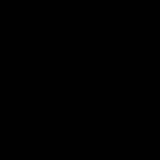

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 30,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


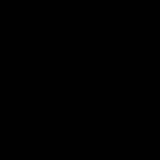

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 31,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


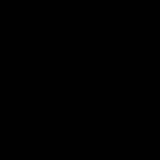

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 32,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


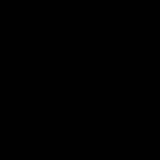

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 33,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


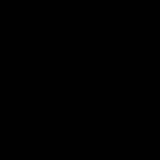

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 34,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


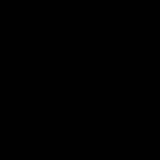

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 35,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


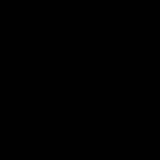

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 36,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


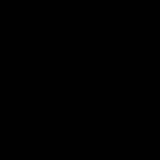

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 37,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


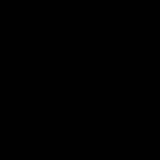

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 38,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


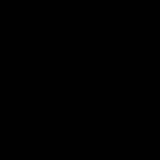

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 39,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


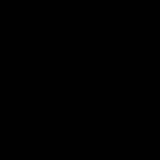

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 40,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


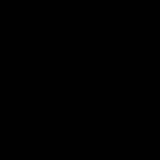

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 41,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


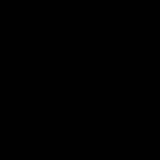

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 42,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


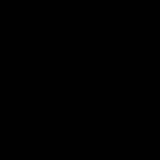

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 43,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


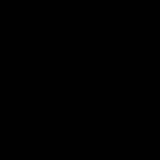

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 44,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


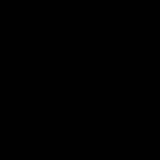

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 45,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


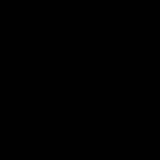

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 46,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


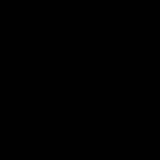

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 47,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


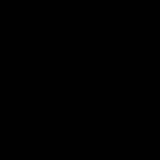

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 48,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


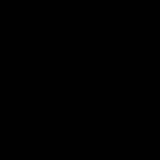

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 49,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


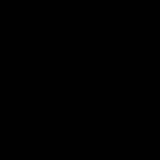

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 50,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


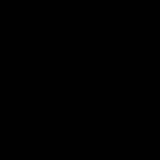

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 51,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


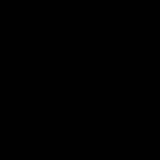

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 52,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


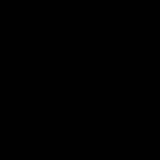

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 53,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


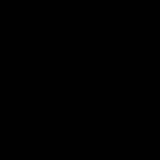

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 54,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


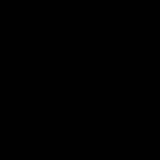

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 55,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


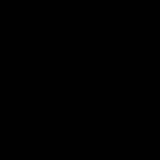

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 56,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


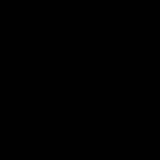

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 57,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


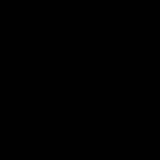

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 58,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


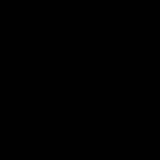

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 59,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


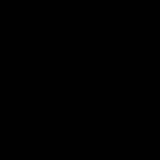

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 60,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


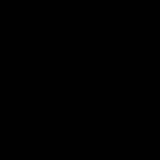

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 61,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


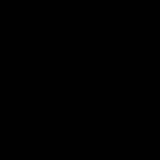

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 62,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


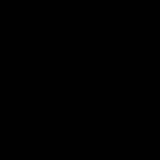

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 63,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


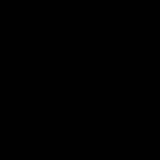

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 64,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


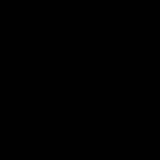

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 65,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


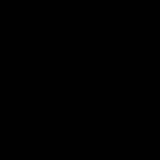

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 66,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


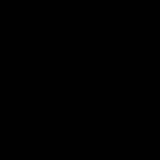

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 67,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


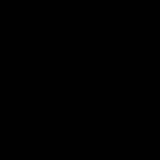

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 68,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


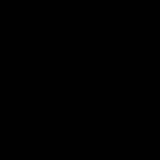

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 69,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


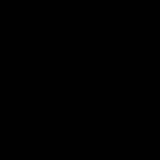

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 70,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


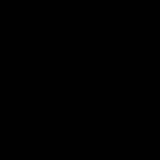

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 71,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


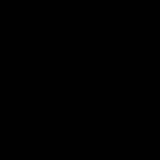

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 72,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


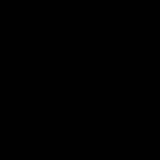

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 73,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


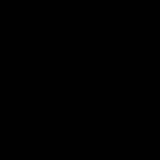

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 74,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


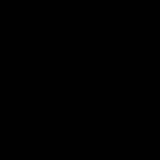

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 75,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


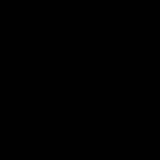

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 76,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


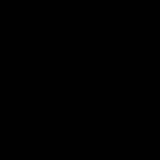

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 77,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


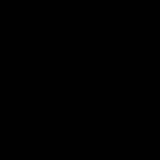

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 78,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


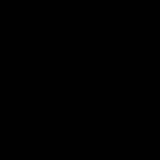

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 79,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


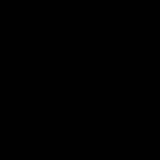

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 80,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


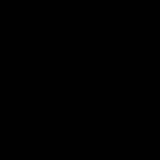

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 81,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


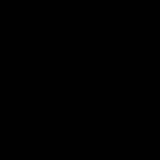

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 82,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


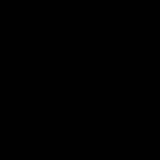

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 83,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


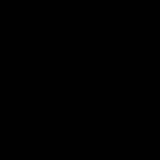

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 84,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


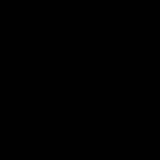

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 85,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


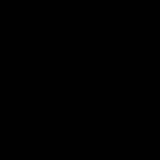

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 86,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


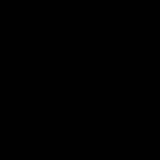

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 87,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


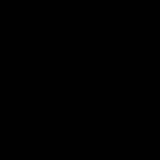

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 88,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


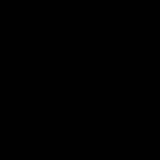

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 89,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


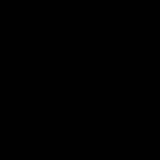

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 90,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


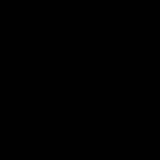

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 91,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


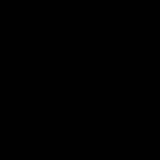

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 92,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


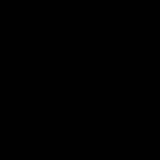

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 93,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


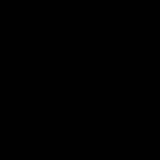

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 94,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


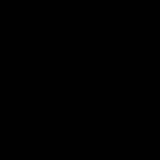

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 95,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


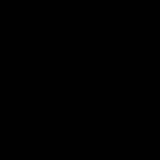

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 96,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


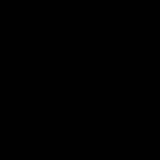

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 97,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


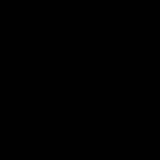

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 98,  Cost = 0.10000000
Autograd ArrayBox with value [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


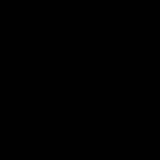

0.1
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
Iteration = 99,  Cost = 0.10000000
Optimized weights: [[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]


In [ ]:
# Initialize the optimizer
opt = qml.AdamOptimizer(stepsize=0.01)

# Set the number of steps
steps = 100

# Optimization loop
for it in range(steps):
    weights_p1, cost = opt.step_and_cost(objective, weights_p1)
    print(weights_p1)
    print("Iteration = {:},  Cost = {:.8f}".format(it, cost))

# Output the optimized parameters
print("Optimized weights: {}".format(weights_p1))

def callback(params):
    print("Current loss:", objective(params))
    

In [ ]:
# Initialize the weights
# weights_p1 = np.random.random(size=shape_p)
# weights_p2 = np.random.random(size=shape_p)
# weights_p3 = np.random.random(size=shape_p)
# weights_p4 = np.random.random(size=shape_p)

# Flatten and concatenate the initial parameters
init_params = np.concatenate([weights_p1.flatten()])
print(qml.draw(circuit)(weights_p1,1))

# Optimize using BFGS algorithm
opt = minimize(objective, init_params, method='Nelder-Mead',callback=callback)

0: ─╭StronglyEntanglingLayers(M0)─┤ ╭Probs
1: ─├StronglyEntanglingLayers(M0)─┤ ├Probs
2: ─├StronglyEntanglingLayers(M0)─┤ ├Probs
3: ─├StronglyEntanglingLayers(M0)─┤ ├Probs
4: ─├StronglyEntanglingLayers(M0)─┤ ├Probs
5: ─├StronglyEntanglingLayers(M0)─┤ ├Probs
6: ─├StronglyEntanglingLayers(M0)─┤ ├Probs
7: ─╰StronglyEntanglingLayers(M0)─┤ ╰Probs
M0 = 
[[[0.973177   0.53886208 0.5262631 ]
  [0.09070398 0.6032145  0.44091675]
  [0.26652816 0.4369166  0.49253013]
  [0.91468466 0.53301562 0.73521908]
  [0.81697192 0.14514894 0.83754249]
  [0.66792459 0.2352488  0.6011704 ]
  [0.29002278 0.0807057  0.19652895]
  [0.07865614 0.1149242  0.62391812]]]
[0.973177   0.53886208 0.5262631  0.09070398 0.6032145  0.44091675
 0.26652816 0.4369166  0.49253013 0.91468466 0.53301562 0.73521908
 0.81697192 0.14514894 0.83754249 0.66792459 0.2352488  0.6011704
 0.29002278 0.0807057  0.19652895 0.07865614 0.1149242  0.62391812]


IndexError: tuple index out of range

In [ ]:
print("Optimized Parameters:", opt.x)
print("Optimized Expectation Value:", opt.fun)

original_length = np.prod(shape_p)
params = opt.x
# Extract segments for each set of weights
weights_p1_flat = params[0 : original_length]
# weights_p2_flat = params[original_length : 2*original_length]
# weights_p3_flat = params[2*original_length : 3*original_length]
# weights_p4_flat = params[3*original_length : 4*original_length]

# Reshape each segment
weights_p1 = weights_p1_flat.reshape(shape_p)
# weights_p2 = weights_p2_flat.reshape(shape_p)
# weights_p3 = weights_p3_flat.reshape(shape_p)
# weights_p4 = weights_p4_flat.reshape(shape_p)
# print(circuit_res(weights_p1,weights_p2,weights_p3,weights_p4)

In [ ]:
res = circuit(weights_p1,0)
# print(res)

In [ ]:

# Example array
arr = res
n = 3

# Find n largest numbers and their indices
largest_elements, indices = find_n_largest_numbers(arr, n)

# Convert indices to binary
binary_indices = indices_to_binary(indices)

print("Largest elements:", largest_elements)
print("Indices:", indices)
print("Indices in binary:", binary_indices)
